# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

## **Web Scraping**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


## **Data Cleaning and Preparation**

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Obviously many airlines hav...
1,✅ Trip Verified | Lost 3 out of 4 checked bags...
2,✅ Trip Verified | I have flown with BA for ma...
3,✅ Trip Verified | Boarding at Mumbai was chaot...
4,"Not Verified | Mexico City Airport is a zoo, b..."


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | Obviously many airlines hav...
1,✅ Trip Verified | Lost 3 out of 4 checked bags...
2,✅ Trip Verified | I have flown with BA for ma...
3,✅ Trip Verified | Boarding at Mumbai was chaot...
4,"Not Verified | Mexico City Airport is a zoo, b..."
...,...
995,Not Verified | First time flying with British...
996,✅ Trip Verified | Geneva to Vancouver via Lon...
997,✅ Trip Verified | This is the first time I ha...
998,✅ Trip Verified | Our original flight was can...


In [6]:
df.isnull().sum()

reviews    0
dtype: int64

We can see that there are no null values.

In [7]:
# Since the text is very messy, we will be splitting the verification status and reviews into two different columns.
df[['Verification Status','Reviews']] = df.reviews.str.split('|',expand = True)
df.head()

,reviews,Verification Status,Reviews
0,✅ Trip Verified | Obviously many airlines hav...,✅ Trip Verified,Obviously many airlines have gone downhill i...
1,✅ Trip Verified | Lost 3 out of 4 checked bags...,✅ Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...
2,✅ Trip Verified | I have flown with BA for ma...,✅ Trip Verified,I have flown with BA for many years and ther...
3,✅ Trip Verified | Boarding at Mumbai was chaot...,✅ Trip Verified,Boarding at Mumbai was chaotic and badly orga...
4,"Not Verified | Mexico City Airport is a zoo, b...",Not Verified,"Mexico City Airport is a zoo, but taking the ..."


In [8]:
# Dropping the original reviews column
df = df.drop(columns=['reviews'])
df.head()

,Verification Status,Reviews
0,✅ Trip Verified,Obviously many airlines have gone downhill i...
1,✅ Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...
2,✅ Trip Verified,I have flown with BA for many years and ther...
3,✅ Trip Verified,Boarding at Mumbai was chaotic and badly orga...
4,Not Verified,"Mexico City Airport is a zoo, but taking the ..."


In [9]:
# Removing the tick sign, since it may affect our analysis and removing leading and trailing spaces
df['Verification Status'] = df['Verification Status'].str.replace(r'✅','')
df['Verification Status'] = df['Verification Status'].str.replace(r'❎','')
df['Verification Status'] = df['Verification Status'].str.strip()
df.head()

,Verification Status,Reviews
0,Trip Verified,Obviously many airlines have gone downhill i...
1,Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...
2,Trip Verified,I have flown with BA for many years and ther...
3,Trip Verified,Boarding at Mumbai was chaotic and badly orga...
4,Not Verified,"Mexico City Airport is a zoo, but taking the ..."


In [10]:
df['Verification Status'].value_counts()

Trip Verified    817
Not Verified     183
Name: Verification Status, dtype: int64

Most of the trips are verified trips

In [84]:
import plotly.express as px
fig = px.histogram(df,x='Verification Status')
fig.show()

## **Sentiment Analysis**

In [36]:
from textblob import TextBlob
sentiment_score = []
def apply_textblob():
    for i in range(len(df['Reviews'])):
        blob = TextBlob(df['Reviews'][i])
        sentiment = blob.sentiment.polarity 
        sentiment_score.append(sentiment)
    sentiment_score_series = pd.Series(sentiment_score)
    df['sentiment'] = sentiment_score_series.values

In [37]:
apply_textblob()

In [38]:
# We can see the sentiment score
df.head()

,Verification Status,Reviews,sentiment
0,Trip Verified,Obviously many airlines have gone downhill i...,0.048765
1,Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...,-0.420000
2,Trip Verified,I have flown with BA for many years and ther...,0.057813
3,Trip Verified,Boarding at Mumbai was chaotic and badly orga...,0.184668
4,Not Verified,"Mexico City Airport is a zoo, but taking the ...",0.130211


In [39]:
# If sentiment value is greater than 0, we would return 1(positive) else 0(negative)
def binning(val):
    if val > 0:
        return 1
    else:
        return 0

In [42]:
df['sentiment_score'] = df['sentiment'].apply(binning)
df.head()

,Verification Status,Reviews,sentiment,sentiment_score
0,Trip Verified,Obviously many airlines have gone downhill i...,0.048765,1
1,Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...,-0.420000,0
2,Trip Verified,I have flown with BA for many years and ther...,0.057813,1
3,Trip Verified,Boarding at Mumbai was chaotic and badly orga...,0.184668,1
4,Not Verified,"Mexico City Airport is a zoo, but taking the ...",0.130211,1


In [49]:
score = df['sentiment_score'].value_counts()
score

1    668
0    332
Name: sentiment_score, dtype: int64

66.8% are positive reviews while 33.2% are the negative reviews

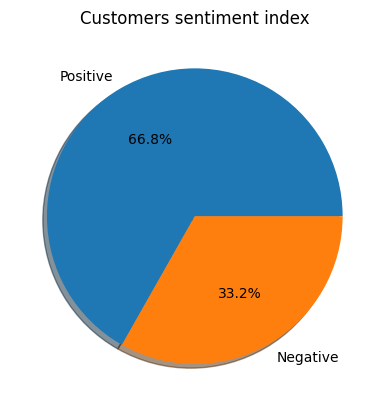

In [51]:
import matplotlib.pyplot as plt
plt.pie(score,labels=['Positive','Negative'],shadow=True,autopct='%1.1f%%')
plt.title('Customers sentiment index')
plt.show()

## **Word Cloud**

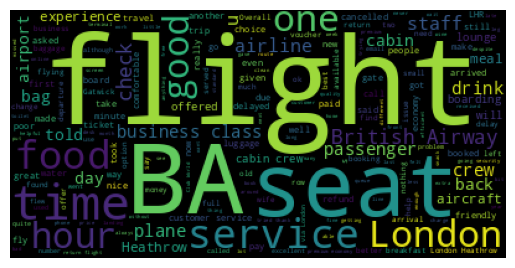

In [81]:
# Creating a worlcloud to see the most frequently used words in reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(' '.join(df['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Some popular words that can be observed here include "service", 
"flight", "time", "seat",  BA". These words are mostly positive, indicating that most reviews in the dataset express a positive sentiment

In [66]:
# Analyzing these positive and negative reviews
positive = df[df['sentiment_score']==1]
negative = df[df['sentiment_score']==0]

In [67]:
review_positive = positive['Reviews'].to_list()
review_negative = negative['Reviews'].to_list()

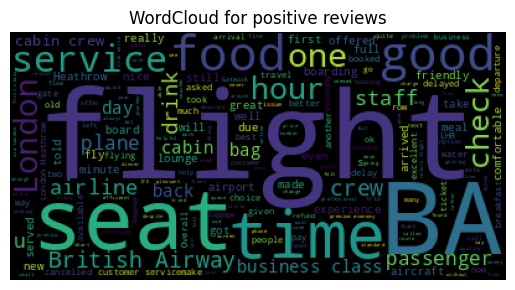

In [78]:
wordcloud = WordCloud().generate(' '.join(review_positive))
plt.imshow(wordcloud)
plt.title('WordCloud for positive reviews')
plt.axis('off')
plt.show()

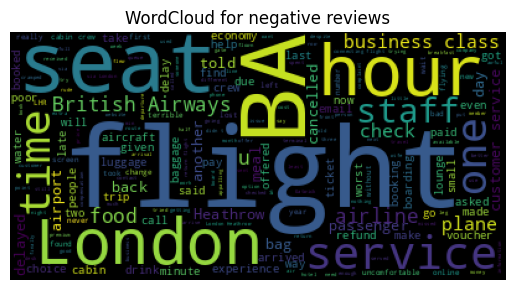

In [79]:
wordcloud = WordCloud().generate(' '.join(review_negative))
plt.imshow(wordcloud)
plt.title('WordCloud for negative reviews')
plt.axis('off')
plt.show()